# 5. Wybor modelu

In [1]:
#sciagniecie wszystkich potrzebnych bibliotek
import pickle
import pandas
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn 
import os
from os import listdir
from os.path import isfile, join

In [2]:
path_list=os.getcwd().split('/')

In [3]:
models_path='/'.join(path_list)+'/models_new'
histories_path='/'.join(path_list)+'/histories_new'

In [4]:
models_files = [f for f in listdir(models_path) if isfile(join(models_path, f))]
history_files = [f for f in listdir(histories_path) if isfile(join(histories_path, f))]

models_files=[file for file in models_files if file[0]!='.']
history_files=[file for file in history_files if file[0]!='.']

In [5]:
histories=[]
models=[]
for i in range(len(models_files)):
    print(models_files[i])
    with open(histories_path+'/'+history_files[i],'rb') as f:
        history=pickle.load(f)
    histories.append(history)
    with open(models_path+'/'+models_files[i],'rb') as f:
        model=pickle.load(f)
    models.append(model)
    
    

model_simple.pkl
model_conv_pool_2_avg_pool.pkl
model_conv_1.pkl
model_conv_2.pkl
model_conv_3.pkl
model_conv_pool_4.pkl
model_conv_pool_5.pkl
model_conv_pool_2_more_filters.pkl
model_conv_pool_6.pkl
model_conv_pool_2.pkl
model_conv_pool_3.pkl
model_conv_pool_1.pkl
model_conv_pool_2_less_pool.pkl
model_ANN.pkl


In [6]:
#sciaganie histori i modelu Inceptionv3
with open('history_inc.pkl','rb') as f:
    history_inc=pickle.load(f)
histories.append(history_inc)

with open('model_inc.pkl','rb') as f:
    model_inc=pickle.load(f)
models.append(model_inc)

In [7]:
#sciaganie danych w formie pickle
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('X_test_color.pkl', 'rb') as f:
    X_test_color = pickle.load(f)

In [8]:
#budowa funkcji, ktorej celem jest prawidlowe sciagniecie pliku zawierajacego 
#etykiety zbioru wykorzystanego do analizy
def read_mat_to_df(file_path):
    np_array= loadmat(file_path, matlab_compatible=False, simplify_cells=True, chars_as_strings=True)
    df= pd.DataFrame(np_array['annotations'])
    if 'class_names' in np_array:
        class_names= list(np_array['class_names'])
        df['class_name']= df['class'].map(dict(enumerate(class_names, start=1)))
    for c, t in df.dtypes.items():
        if t.kind == 'i':
            df[c]= df[c].astype('int16')
    if 'fname' in df.columns:
        df['relative_im_path']= 'car_ims/0' + df['fname']
        df.drop(columns=['fname'], inplace=True)
    return df

cars_full= read_mat_to_df('data_and_labels/cars_annos.mat')
class_class_name_count=cars_full[['class','class_name']].value_counts().reset_index()
class_to_name_dict=dict(zip(class_class_name_count['class'], class_class_name_count.class_name))
cars_full['brand']=[class_name.split()[0] for class_name in cars_full['class_name'].tolist()]
map_brand=cars_full['brand'].value_counts().reset_index()
map_brand['class']=[x for x in range(1,len(map_brand)+1)]
class_to_brand_dict=dict(zip(map_brand['brand'], map_brand['class']))
brand_to_class_dict=dict(zip(map_brand['class'], map_brand['brand']))

In [9]:
#utworzenie wynikow metryk top_1, top_5 dla danych testowych
#metryki zostaly obliczone dla kazdego modelu
y_test_list=[]
for y_test_ob in y_test:
    class_car=list(y_test_ob).index(1)
    y_test_list.append(class_car)

top_1=[]
top_5=[]
which_model=0
for model in models:
    top_1_model=[]
    top_5_model=[]
    i=0
    if which_model==len(models)-1:
        y_pred=model.predict(X_test_color)
    else:
        y_pred=model.predict(X_test)
    for y_pred_ob in y_pred:
        high_to_low=sorted(y_pred_ob,reverse=True)
        high1=list(y_pred_ob).index(max(y_pred_ob))
        high5=[]
        for index_high_to_low in range(5):
            one_of_highest=high_to_low[index_high_to_low]
            high=list(y_pred_ob).index(one_of_highest)
            high5.append(high)
        if high1==y_test_list[i]:
            top_1_model.append(1)
        else:
            top_1_model.append(0) 
            
        if y_test_list[i] in high5:
            top_5_model.append(1)
        else:
            top_5_model.append(0)
        i+=1
    top_1.append(np.mean(top_1_model))
    top_5.append(np.mean(top_5_model))
    which_model+=1


51/51 [==============================] - 50s 918ms/step


In [11]:
df_top=pd.DataFrame()
models_files1=[x[:-4] for x in models_files]
models
models_files1.append('InceptionV3')
df_top['model']=models_files1
df_top['top_1']=top_1
df_top['top_5']=top_5
df_top

,model,top_1,top_5
0,model_simple,0.111180,0.390364
1,model_conv_pool_2_avg_pool,0.445954,0.786288
2,model_conv_1,0.180358,0.483632
3,model_conv_2,0.177888,0.473132
4,model_conv_3,0.181594,0.480544
5,model_conv_pool_4,0.407041,0.730080
6,model_conv_pool_5,0.455219,0.770846
7,model_conv_pool_2_more_filters,0.392217,0.735639
8,model_conv_pool_6,0.476838,0.782582
9,model_conv_pool_2,0.436072,0.751699


In [12]:
df_top_new=df_top.iloc[[0,13,2,3,4,11,9,7,12,1,10,5,6,8]].reset_index()
df_top_new.drop(['index'],axis=1,inplace=True)

In [13]:
df_top_new

,model,top_1,top_5
0,model_simple,0.111180,0.390364
1,model_ANN,0.110562,0.414453
2,model_conv_1,0.180358,0.483632
3,model_conv_2,0.177888,0.473132
4,model_conv_3,0.181594,0.480544
5,model_conv_pool_1,0.280420,0.637431
6,model_conv_pool_2,0.436072,0.751699
7,model_conv_pool_2_more_filters,0.392217,0.735639
8,model_conv_pool_2_less_pool,0.378629,0.711550
9,model_conv_pool_2_avg_pool,0.445954,0.786288


In [14]:
#wybrany model oraz jego architektura
final_model=models[8]
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 16)      160       
                                                                 
 average_pooling2d_5 (Averag  (None, 67, 67, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 67, 67, 32)        4640      
                                                                 
 average_pooling2d_6 (Averag  (None, 23, 23, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 average_pooling2d_7 (Averag  (None, 8, 8, 64)        

# 6. Analiza wynikow

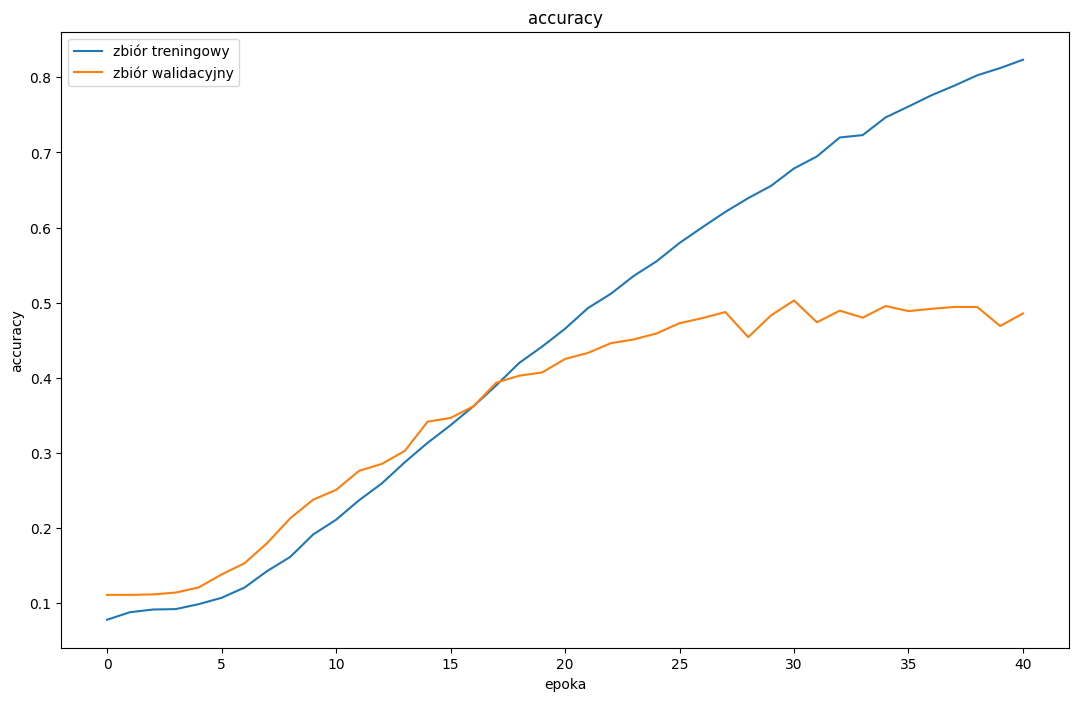

In [15]:
#utworzenie wykresu dotyczacego procesu uczenia sie wybranego modelu
for i,history in enumerate(histories):
    if i==11:
        plt.figure(figsize=(13,8))
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoka')
        plt.legend(['zbiór treningowy', 'zbiór walidacyjny'], loc='upper left')
        plt.show()

In [16]:
#utworzenie predykcji na danych testowych
y_pred=final_model.predict(X_test)

#zmiana formy danych dotyczacych predykcji danych testowych
y_pred_list=[]
for y_pred_ob in y_pred:
    y_pred_obs=[1 if x==max(y_pred_ob) else 0 for x in y_pred_ob]
    class_car=y_pred_obs.index(1)
    brand_car=brand_to_class_dict[class_car]
    y_pred_list.append(brand_car)
y_pred_list=np.array(y_pred_list)

#zmiana formy zmiennej celu w zbiorze testowym
y_test_list=[]
for y_test_ob in y_test:
    class_car=list(y_test_ob).index(1)
    brand_car=brand_to_class_dict[class_car]
    y_test_list.append(brand_car)


51/51 [==============================] - 3s 64ms/step


In [17]:
#utworzenie tabeli dataframe ukazujacej wyniki predykcji modelu na danych testowych
unique, counts = np.unique(y_test_list, return_counts=True)
con_max=confusion_matrix(y_pred_list,y_test_list)
df_cm = pd.DataFrame(con_max, unique, unique)
df_cm.loc['sum_y_test']=df_cm.sum().tolist()
df_cm['sum_y_pred']=df_cm.T.sum().tolist()

In [18]:
#utworzenie tabeli ukazujacej metryki Precision, Recall oraz F1-score d;a kzdej klasy zmiennej objasnianej.
#co wiecej, w ostatniej kolumnie zawarto klase/klasy, ktore byly najczesciej mylone z analizowana marka
marki=df_cm.columns[:49].tolist()
precision=[]
recall=[]
most_confused_brand=[]
for i,marka in enumerate(marki):
    precision.append(df_cm.loc[marka][marka]/df_cm['sum_y_pred'][i])
    recall.append(df_cm.loc[marka][marka]/df_cm.loc['sum_y_test'][i])
    wiersz=df_cm[marka].copy()
    wiersz=wiersz.drop([marka,'sum_y_test'])
    most_conf_brand=[i for i,x in wiersz.items() if x==max(wiersz)]
    most_confused_brand.append(most_conf_brand)
df_metrics=pd.DataFrame({'Marka':marki,'Precision':precision,'Recall':recall})
df_metrics['F1_score']=2*((df_metrics['Recall']*df_metrics['Precision'])/(df_metrics['Recall']+df_metrics['Precision']))
df_metrics['Most confused brand']=most_confused_brand

<ipython-input-18-096750f1c71c>:8: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(df_cm.loc[marka][marka]/df_cm['sum_y_pred'][i])
<ipython-input-18-096750f1c71c>:8: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(df_cm.loc[marka][marka]/df_cm['sum_y_pred'][i])


In [19]:
df_metrics

,Marka,Precision,Recall,F1_score,Most confused brand
0,AM,0.666667,0.888889,0.761905,[HUMMER]
1,Acura,0.369231,0.500000,0.424779,[Audi]
2,Aston,0.451613,0.437500,0.444444,[Ferrari]
3,Audi,0.514124,0.777778,0.619048,[BMW]
4,BMW,0.508772,0.547170,0.527273,[Audi]
5,Bentley,0.666667,0.425532,0.519481,[BMW]
6,Bugatti,0.666667,0.533333,0.592593,"[Audi, Lamborghini, Mitsubishi]"
7,Buick,0.666667,0.375000,0.480000,"[Audi, BMW]"
8,Cadillac,0.200000,0.192308,0.196078,[Chevrolet]
9,Chevrolet,0.415493,0.655556,0.508621,[Acura]


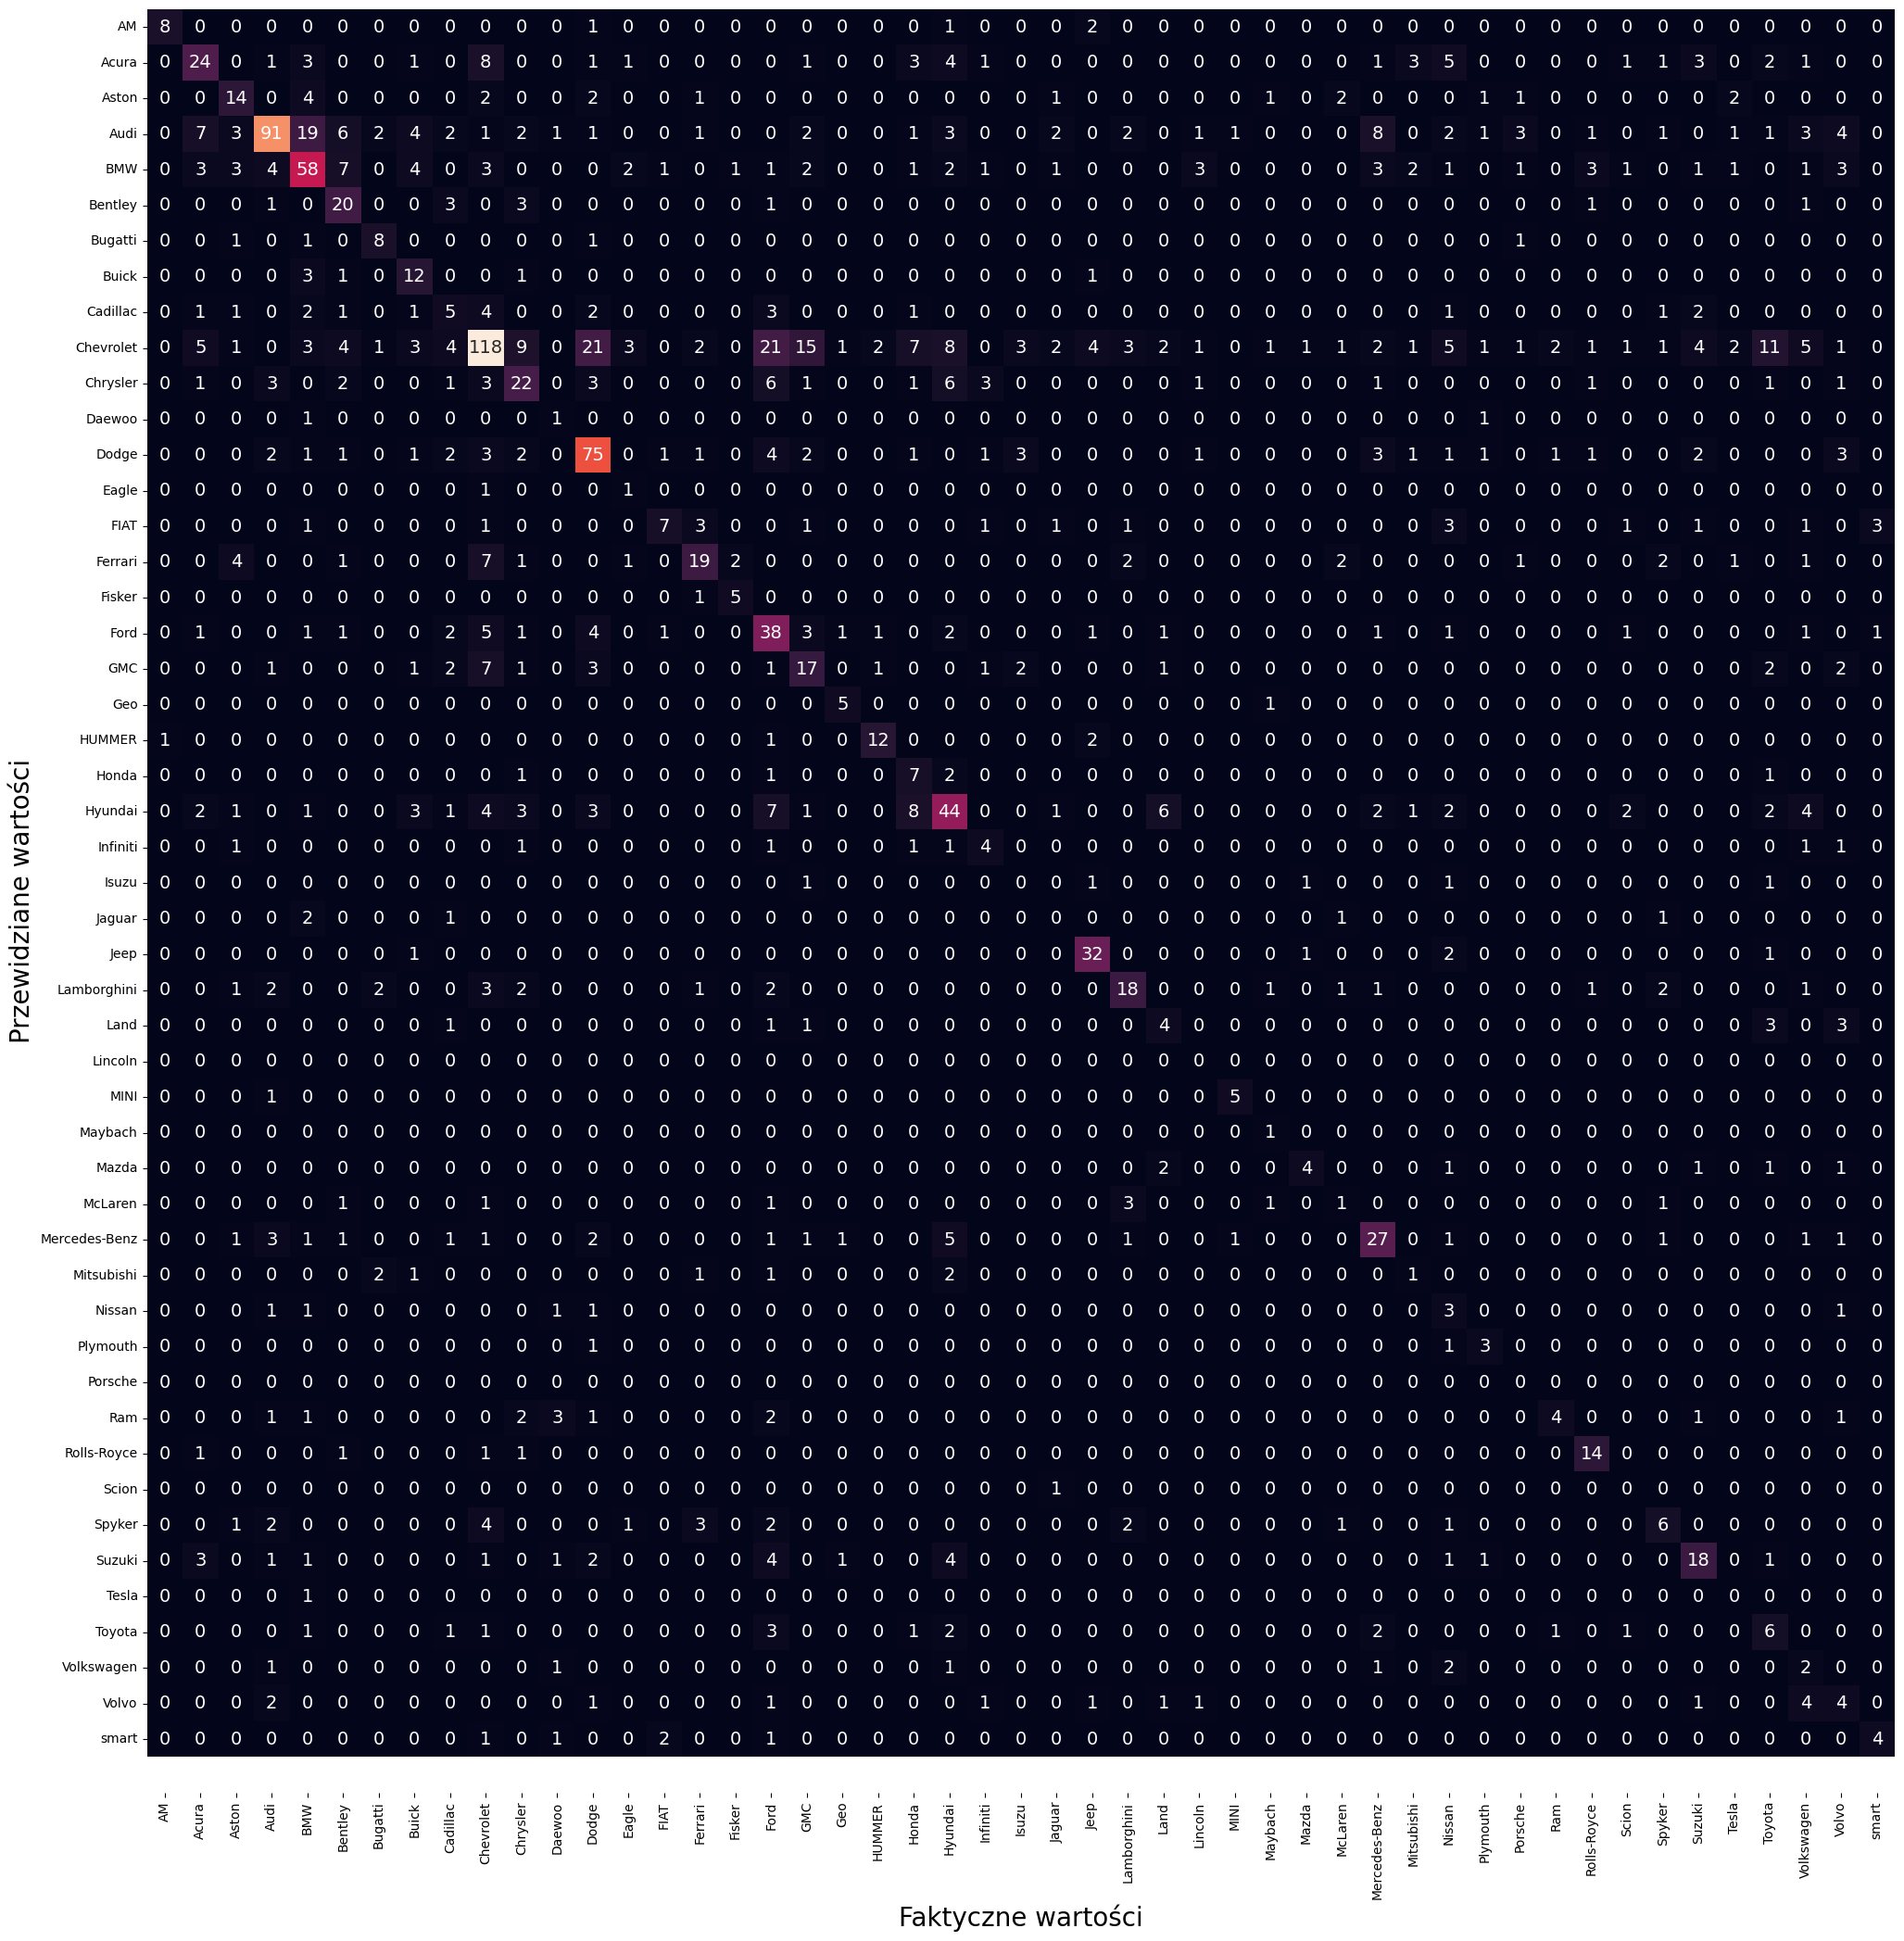

In [20]:
unique, counts = np.unique(y_test_list, return_counts=True)
con_max=confusion_matrix(y_pred_list,y_test_list)
df_cm = pd.DataFrame(con_max, unique, unique)

# utworzenie wykresu ukazujacego macierz bledu
plt.figure(figsize=(25,25))
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, square=True, cbar=False, fmt='g')
ax.set_ylim(0, 50)
plt.xlabel("Faktyczne wartości", fontsize=20) 
plt.ylabel("Przewidziane wartości", fontsize=20) 
ax.invert_yaxis()
plt.savefig('conf_matrix.png', bbox_inches='tight')
plt.show()